In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from datetime import datetime as dt
import random as rd
from collections import Counter

In [2]:
hours = [9, 10, 11, 12, 13, 14, 15, 16, 17]
sales = [3459.00, 54290.99, 23444.00, 453299.99, 35099.00, 78442.50, 45113.00, 674000.00, 49834.00]

In [3]:
##scatter plot

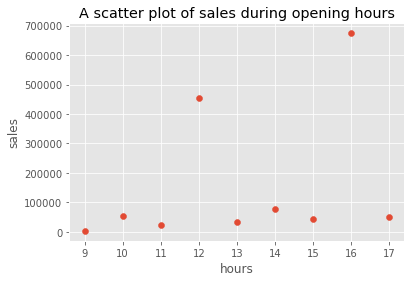

In [4]:
plt.scatter(hours, sales)

plt.title("A scatter plot of sales during opening hours")
plt.xlabel("hours")
plt.ylabel("sales")

plt.show()

In [5]:
plt.rcParams["figure.figsize"] = [10, 6]

In [6]:
##line plot

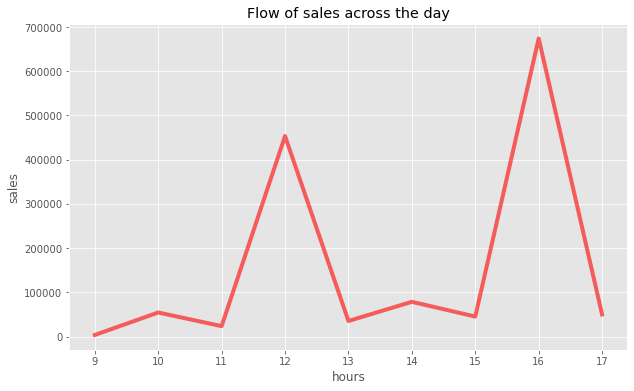

In [7]:
plt.plot(hours, sales, color = "red", linewidth = 4, alpha = 0.6)

plt.title("Flow of sales across the day")
plt.xlabel("hours")
plt.ylabel("sales")

plt.show()

In [8]:
data = pd.read_csv("slippo.csv")
data.head()

,Name,Sales,Date
0,Sebastian Waite,607193,1-1-2020
1,Lizzie Haggins,1171366,1-1-2020
2,Ima Gaudreau,941504,1-1-2020
3,Leticia Michelsen,721826,1-1-2020
4,Stanley Margolin,904494,1-1-2020


In [9]:
data.set_index(pd.Index([num for num in range(1, len(data) + 1)]), inplace = True)

In [10]:
data.head()

,Name,Sales,Date
1,Sebastian Waite,607193,1-1-2020
2,Lizzie Haggins,1171366,1-1-2020
3,Ima Gaudreau,941504,1-1-2020
4,Leticia Michelsen,721826,1-1-2020
5,Stanley Margolin,904494,1-1-2020


In [11]:
data["Date"] = data["Date"].apply(lambda a : dt.strptime(a, "%d-%m-%Y"))

In [12]:
data["Month"] = data["Date"]

In [13]:
data.head()

,Name,Sales,Date,Month
1,Sebastian Waite,607193,2020-01-01,2020-01-01
2,Lizzie Haggins,1171366,2020-01-01,2020-01-01
3,Ima Gaudreau,941504,2020-01-01,2020-01-01
4,Leticia Michelsen,721826,2020-01-01,2020-01-01
5,Stanley Margolin,904494,2020-01-01,2020-01-01


In [14]:
data["Month"] = data["Month"].apply(lambda a : a.strftime("%b"))

In [15]:
data.head()

,Name,Sales,Date,Month
1,Sebastian Waite,607193,2020-01-01,Jan
2,Lizzie Haggins,1171366,2020-01-01,Jan
3,Ima Gaudreau,941504,2020-01-01,Jan
4,Leticia Michelsen,721826,2020-01-01,Jan
5,Stanley Margolin,904494,2020-01-01,Jan


In [16]:
data.tail()

,Name,Sales,Date,Month
10046,Teresita Prouty,1158771,2020-11-30,Nov
10047,Latina Terry,994825,2020-11-30,Nov
10048,Jane Carlton,613026,2020-11-30,Nov
10049,Sean Lamberson,627619,2020-11-30,Nov
10050,Cherri Hayden,387711,2020-11-30,Nov


In [17]:
needed_df = pd.DataFrame(data.groupby("Month")["Sales"].sum()).reset_index()
needed_df

,Month,Sales
0,Apr,679951155
1,Aug,705610454
2,Feb,653702163
3,Jan,655053020
4,Jul,679750493
5,Jun,661428040
6,Mar,682581876
7,May,693291300
8,Nov,650896427
9,Oct,705718831


In [18]:
needed_df["Month"] = needed_df["Month"].apply(lambda a : dt.strptime(a, "%b"))

In [19]:
needed_df.head()

,Month,Sales
0,1900-04-01,679951155
1,1900-08-01,705610454
2,1900-02-01,653702163
3,1900-01-01,655053020
4,1900-07-01,679750493


In [20]:
needed_df.sort_values(by = "Month", inplace = True)

In [21]:
needed_df.head()

,Month,Sales
3,1900-01-01,655053020
2,1900-02-01,653702163
6,1900-03-01,682581876
0,1900-04-01,679951155
7,1900-05-01,693291300


In [22]:
needed_df["Month"] = needed_df["Month"].apply(lambda a : a.strftime("%b"))

In [23]:
needed_df.head()

,Month,Sales
3,Jan,655053020
2,Feb,653702163
6,Mar,682581876
0,Apr,679951155
7,May,693291300


In [24]:
slippo_x = needed_df["Month"].to_list()
slippo_y = needed_df["Sales"].to_list()

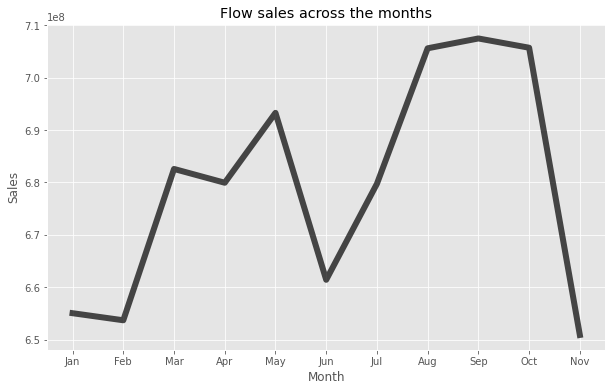

In [25]:
####time to plot!!!

plt.plot(slippo_x, slippo_y, linewidth = 6, color = "k", alpha = 0.7)

plt.title("Flow sales across the months")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()
# plt.plot

In [26]:
xyz_data = needed_df.copy()
xyz_data.head()

,Month,Sales
3,Jan,655053020
2,Feb,653702163
6,Mar,682581876
0,Apr,679951155
7,May,693291300


In [27]:
extracted_sales = xyz_data["Sales"].to_list()
rd.seed(77)
rd.shuffle(extracted_sales)

In [28]:
extracted_sales

[679750493,
 705718831,
 650896427,
 705610454,
 682581876,
 655053020,
 653702163,
 707486354,
 679951155,
 661428040,
 693291300]

In [29]:
## temporay cell
# quick = [45, 4, 6, 7]
# rd.seed(0)
# pick = rd.choice(quick)

# pick

In [30]:
xyz_data["Sales"] = extracted_sales

In [31]:
xyz_data.head()

,Month,Sales
3,Jan,679750493
2,Feb,705718831
6,Mar,650896427
0,Apr,705610454
7,May,682581876


In [32]:
needed_df.head()

,Month,Sales
3,Jan,655053020
2,Feb,653702163
6,Mar,682581876
0,Apr,679951155
7,May,693291300


In [33]:
xyz_x = xyz_data["Month"]
xyz_y = xyz_data["Sales"]

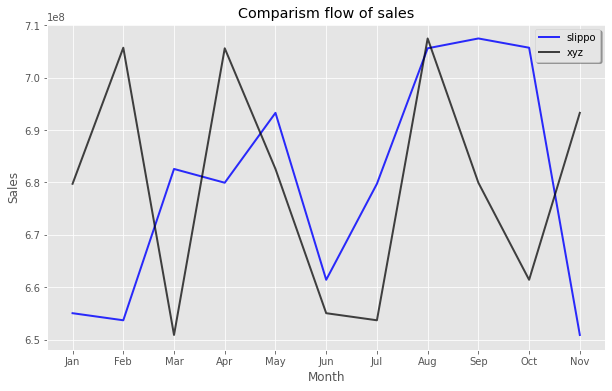

In [34]:
###multi-line plot

plt.plot(slippo_x, slippo_y, linewidth = 2, alpha = 0.82, color = "blue", label = "slippo")
plt.plot(xyz_x, xyz_y, linewidth = 2, alpha = 0.73, color = "black", label = "xyz")

plt.title("Comparism flow of sales")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.legend(loc = "best", shadow = True)
plt.show()

In [35]:
needed_df.head()

,Month,Sales
3,Jan,655053020
2,Feb,653702163
6,Mar,682581876
0,Apr,679951155
7,May,693291300


In [36]:
###bar chart

In [37]:
all_colors = ["blue", "pink", "orange", "green", "cyan", "purple", "brown", "yellow", "brown", "indigo", "grey"]

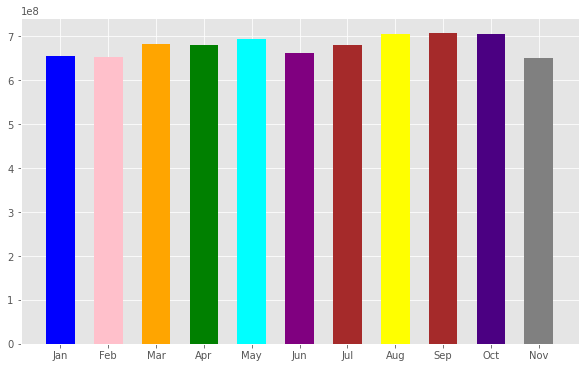

In [38]:
plt.bar(slippo_x, slippo_y, width = 0.6, color = all_colors)
plt.show()

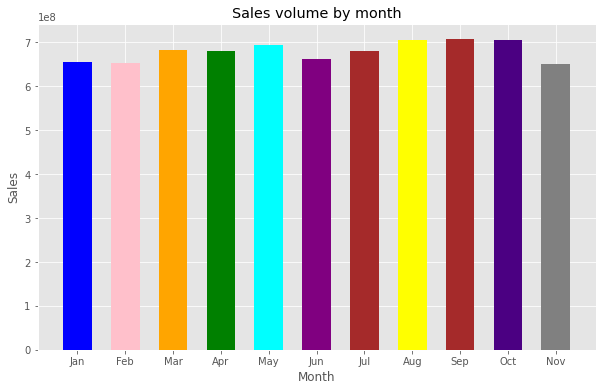

In [39]:
plt.bar(slippo_x, slippo_y, width = 0.6, color = all_colors[:  11])

plt.title("Sales volume by month")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()

In [40]:
new_data = pd.read_csv("Ecom Expense.csv")
new_data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [41]:
b = pd.DataFrame(new_data["City Tier"].value_counts()).reset_index()

In [42]:
extracted_tier = b["index"].to_list()
extracted_tier

['Tier 1', 'Tier 2', 'Tier 3']

In [43]:
extracted_count = b["City Tier"].to_list()
extracted_count

[815, 782, 765]

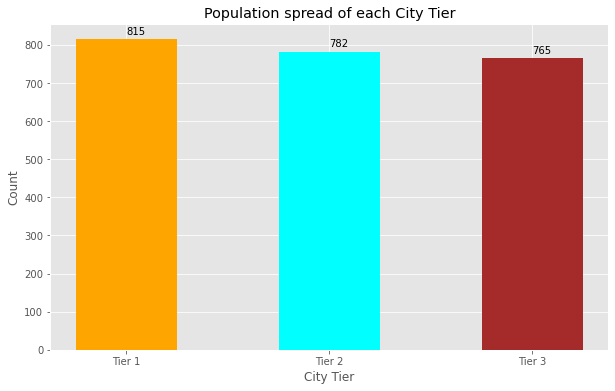

In [44]:
plt.bar(extracted_tier, extracted_count, width = 0.5, color = all_colors[2: 8: 2])

plt.title("Population spread of each City Tier")
plt.xlabel("City Tier")
plt.ylabel("Count")

for index, value in enumerate(extracted_count):
    plt.text(x = index, y = value + 13, s = f"{value}")

plt.show()

In [45]:
smart_group = pd.DataFrame(new_data.groupby("Gender")["City Tier"].value_counts())
smart_group

City Tier
Gender City Tier           
Female Tier 1           403
       Tier 2           384
       Tier 3           375
Male   Tier 1           412
       Tier 2           398
       Tier 3           390

In [46]:
Counter(zip(new_data["City Tier"], new_data["Gender"]))

Counter({('Tier 1', 'Female'): 403,
         ('Tier 2', 'Female'): 384,
         ('Tier 2', 'Male'): 398,
         ('Tier 1', 'Male'): 412,
         ('Tier 3', 'Male'): 390,
         ('Tier 3', 'Female'): 375})

In [47]:
left_position = smart_group["City Tier"].to_list()[:3]
right_position = smart_group["City Tier"].to_list()[:3]

In [48]:
##side-by-side bar chart

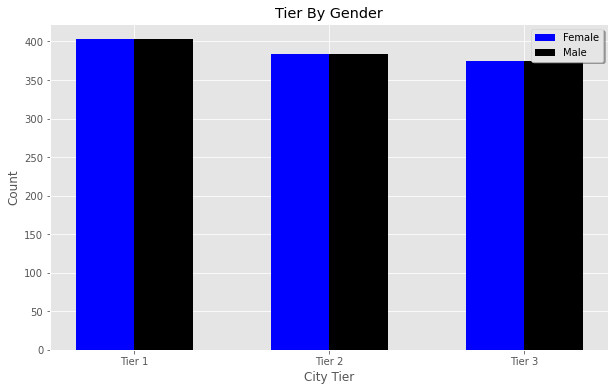

In [49]:
indices = np.arange(3)

plt.bar(indices - 0.3, left_position, width = 0.3, color = "blue", label = "Female")
plt.bar(indices, right_position, width = 0.3, color = "black", label = "Male")
plt.xticks(indices - 0.15, extracted_tier)


plt.title("Tier By Gender")
plt.xlabel("City Tier")
plt.ylabel("Count")

plt.legend(loc = "best", shadow = True)
plt.show()

In [50]:
##Assignment 8

In [51]:
b = pd.DataFrame(new_data["City Tier"].value_counts()).reset_index()

In [52]:
Counter(zip(new_data["City Tier"], new_data["Gender"]))

Counter({('Tier 1', 'Female'): 403,
         ('Tier 2', 'Female'): 384,
         ('Tier 2', 'Male'): 398,
         ('Tier 1', 'Male'): 412,
         ('Tier 3', 'Male'): 390,
         ('Tier 3', 'Female'): 375})

In [53]:
extracted_tier = b["index"].to_list()
extracted_tier

['Tier 1', 'Tier 2', 'Tier 3']

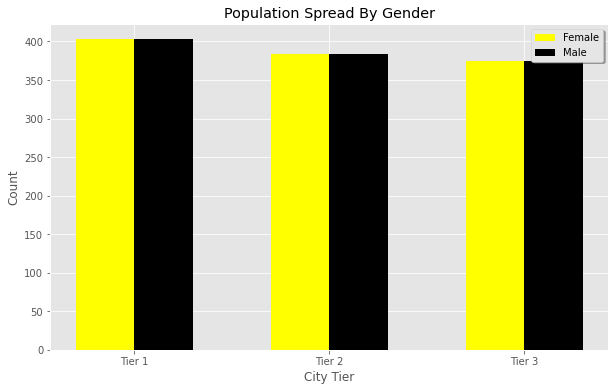

In [54]:
indices = np.arange(3)

plt.bar(indices - 0.3, left_position, width = 0.3, color = "yellow", label = "Female")
plt.bar(indices, right_position, width = 0.3, color = "black", label = "Male")
plt.xticks(indices - 0.15, extracted_tier)


plt.title("Population Spread By Gender")
plt.xlabel("City Tier")
plt.ylabel("Count")

plt.legend(loc = "best", shadow = True)
plt.show()

In [55]:
###stacked bar chart

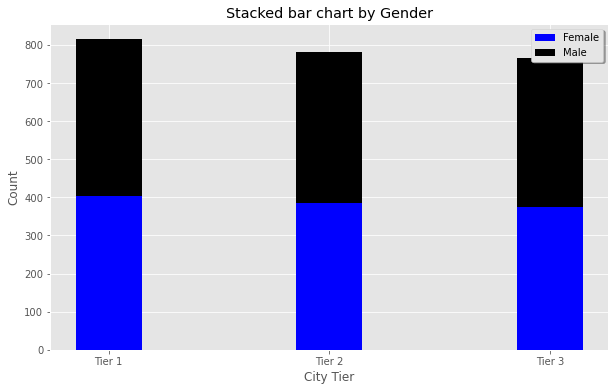

In [56]:
plt.bar(extracted_tier, smart_group["City Tier"].to_list()[:3], color = "blue", width = 0.3, label = "Female")
plt.bar(extracted_tier, smart_group["City Tier"].to_list()[3:], color = "black", width = 0.3, label = "Male", bottom = smart_group["City Tier"].to_list()[:3])


plt.title("Stacked bar chart by Gender")
plt.xlabel("City Tier")
plt.ylabel("Count")

plt.legend(loc = "best", shadow = True)
plt.savefig("Stacked_guy.png")

In [57]:
plt.rcParams["figure.figsize"]= [12, 8]

In [58]:
###pie chart

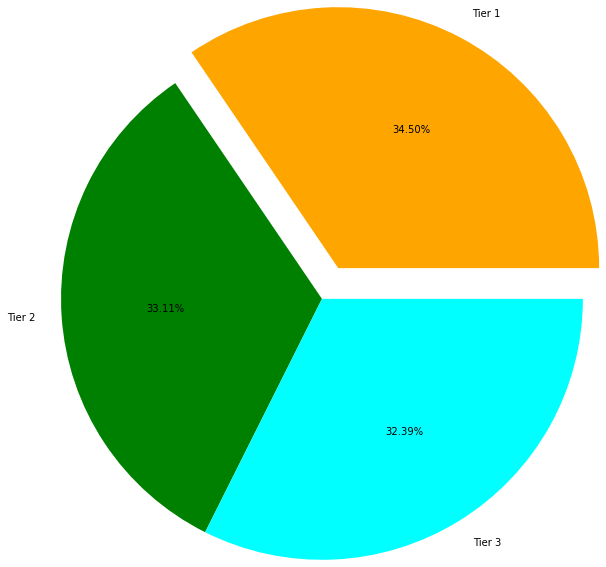

In [59]:
plt.pie(extracted_count, labels = extracted_tier, radius = 1.5, colors = all_colors[2:8], autopct = "%0.2f%%", explode = [0.2, 0, 0])

plt.show()

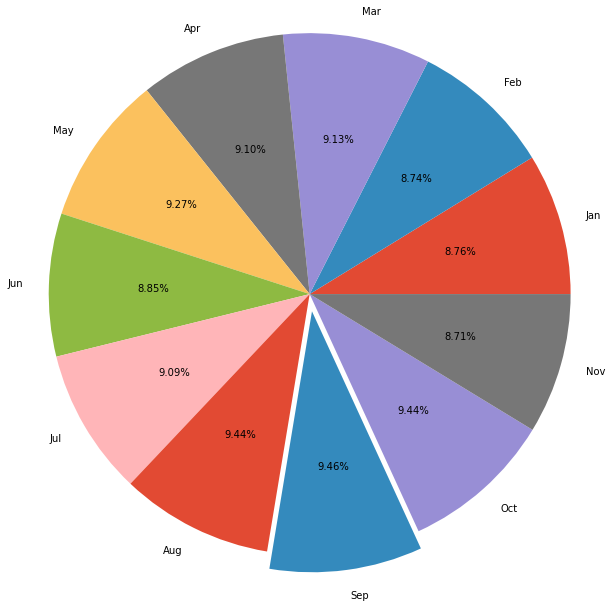

In [60]:
plt.pie(needed_df["Sales"], labels = needed_df["Month"], radius = 1.5, autopct = "%0.2f%%", explode = [0,0,0,0,0,0,0,0,0.1,0,0])

plt.show()

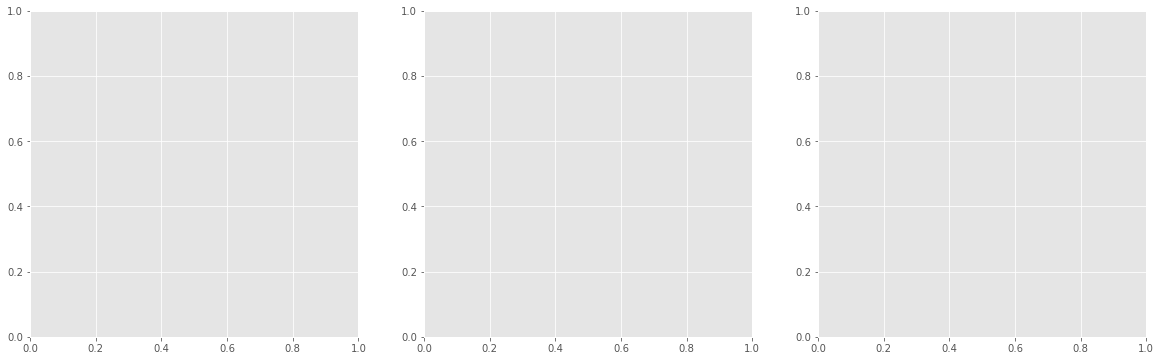

In [61]:
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

plot1 = axs[0]
plot2 = axs[1]
plot3 = axs[2]


In [62]:
###assignment 9

Text(0.5, 1.0, '4th quarter sales report')

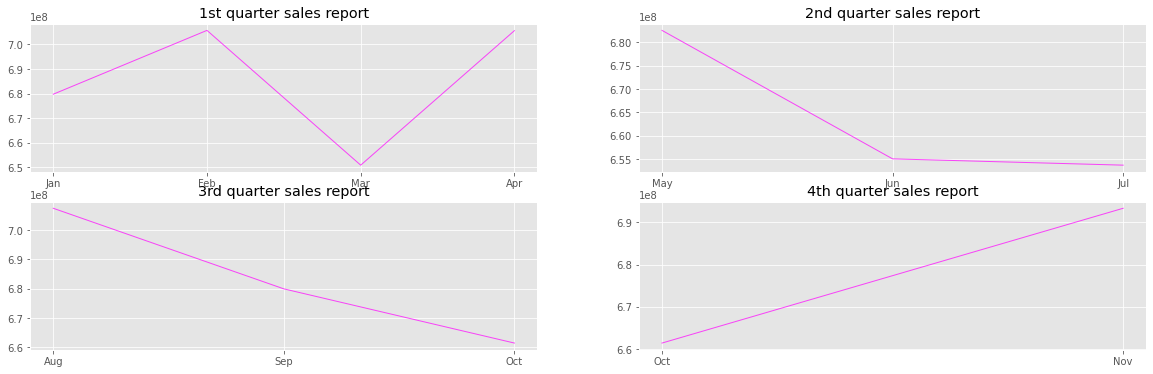

In [63]:
fig, axs = plt.subplots(2, 2, figsize = (20, 6))


plot1 = axs[0, 0]
plot2 = axs[0, 1]
plot3 = axs[1, 0]
plot4 = axs[1, 1]

plot1.plot(xyz_x[:4], xyz_y[:4], linewidth = 1, color = "magenta", alpha = 0.7)
plot1.set_title("1st quarter sales report")

plot2.plot(xyz_x[4:7], xyz_y[4:7], linewidth = 1, color = "magenta", alpha = 0.7)
plot2.set_title("2nd quarter sales report")

plot3.plot(xyz_x[7:10], xyz_y[7:10], linewidth = 1, color = "magenta", alpha = 0.7)
plot3.set_title("3rd quarter sales report")

plot4.plot(xyz_x[-2:], xyz_y[-2:], linewidth = 1, color = "magenta", alpha = 0.7)
plot4.set_title("4th quarter sales report")

In [64]:
Counter(zip(new_data["City Tier"], new_data["Gender"]))

Counter({('Tier 1', 'Female'): 403,
         ('Tier 2', 'Female'): 384,
         ('Tier 2', 'Male'): 398,
         ('Tier 1', 'Male'): 412,
         ('Tier 3', 'Male'): 390,
         ('Tier 3', 'Female'): 375})

In [65]:
Counter(new_data["Gender"])

Counter({'Female': 1162, 'Male': 1200})

In [66]:
1162/(1162+1200) * 815/(815+782+765)

0.1697477202187328

In [67]:
Counter(new_data["City Tier"])

Counter({'Tier 1': 815, 'Tier 2': 782, 'Tier 3': 765})

In [68]:
815/(815+782+765)

0.34504657070279426

In [69]:
(1200/2362) * (782/2362)

0.1682008602190626

In [70]:
0.1682008602190626/(782/2362)

0.5080440304826418

In [71]:
##Assignment 

In [72]:
a = "/Users/User/Documents/lotofdata"

In [73]:
##append filename into a list_of_files

list_of_files = []

for i in range(1,333):
    if i >= 100:
        list_of_files.append(f"{a}{i}.csv")
    elif i >= 10:
        list_of_files.append(f"{a}0{i}.csv")
    else:
        list_of_files.append(f"{a}00{i}.csv")

In [74]:
list_of_files

['/Users/User/Documents/lotofdata001.csv',
 '/Users/User/Documents/lotofdata002.csv',
 '/Users/User/Documents/lotofdata003.csv',
 '/Users/User/Documents/lotofdata004.csv',
 '/Users/User/Documents/lotofdata005.csv',
 '/Users/User/Documents/lotofdata006.csv',
 '/Users/User/Documents/lotofdata007.csv',
 '/Users/User/Documents/lotofdata008.csv',
 '/Users/User/Documents/lotofdata009.csv',
 '/Users/User/Documents/lotofdata010.csv',
 '/Users/User/Documents/lotofdata011.csv',
 '/Users/User/Documents/lotofdata012.csv',
 '/Users/User/Documents/lotofdata013.csv',
 '/Users/User/Documents/lotofdata014.csv',
 '/Users/User/Documents/lotofdata015.csv',
 '/Users/User/Documents/lotofdata016.csv',
 '/Users/User/Documents/lotofdata017.csv',
 '/Users/User/Documents/lotofdata018.csv',
 '/Users/User/Documents/lotofdata019.csv',
 '/Users/User/Documents/lotofdata020.csv',
 '/Users/User/Documents/lotofdata021.csv',
 '/Users/User/Documents/lotofdata022.csv',
 '/Users/User/Documents/lotofdata023.csv',
 '/Users/Us

In [75]:
###create a generator to yeild from file iterator

def open_file(fnames):
    for fname in fnames:
        with open(fname) as f:
            yield from f

In [76]:
###initialize generator

gen = open_file(list_of_files)

In [77]:
output = (4500 - new_data["Total Spend"].mean()) / new_data["Total Spend"].std()
output

-0.5940399361525682

In [78]:
output1 = (6000 - new_data["Total Spend"].mean()) / new_data["Total Spend"].std()
output1

-0.05828203598683635

In [79]:
output2 = (8000 - new_data["Total Spend"].mean()) / new_data["Total Spend"].std()
output2

0.6560618309008062

In [80]:
##t-test

In [81]:
from scipy.stats import ttest_ind

In [82]:
new_data.columns

Index(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype='object')

In [83]:
ttest_ind(new_data["Monthly Income"], new_data["Transaction Time"])

Ttest_indResult(statistic=93.35131269509321, pvalue=0.0)

In [84]:
new_data.rename(columns = {"Age " : "Age" }, inplace = True)

In [85]:
new_data.rename(columns = {" Items " : "Items" }, inplace = True)

In [86]:
ttest_ind(new_data.Age, new_data.Items)

Ttest_indResult(statistic=123.06353887439704, pvalue=0.0)

In [87]:
fem_only = new_data[new_data["Gender"] == "Female"]
mal_only = new_data[new_data["Gender"] == "Male"]

In [88]:
ttest_ind(fem_only["Total Spend"], mal_only["Total Spend"])

Ttest_indResult(statistic=-1.7734206545691216, pvalue=0.0762879678239681)

In [89]:
###chi square

In [90]:
from scipy.stats import chi2_contingency as chi

In [91]:
chi(pd.crosstab(new_data["Gender"], new_data["City Tier"]))

(0.03280571059598164,
 0.9837309389979686,
 2,
 array([[400.94411516, 384.70956816, 376.34631668],
        [414.05588484, 397.29043184, 388.65368332]]))

In [92]:
###one way ANOVA

In [93]:
from scipy.stats import f_oneway

In [94]:
tier_one = new_data[new_data["City Tier"] == "Tier 1"]
tier_two = new_data[new_data["City Tier"] == "Tier 2"]
tier_three = new_data[new_data["City Tier"] == "Tier 3"]

In [95]:
f_oneway(tier_one["Total Spend"], tier_two["Total Spend"], tier_three["Total Spend"])

F_onewayResult(statistic=0.6921543550249314, pvalue=0.5005982732354749)

In [96]:
###correlation

In [97]:
empty_guy = pd.DataFrame()
empty_guy["top"] = (new_data["Monthly Income"] - new_data["Monthly Income"].mean()) * (new_data["Total Spend"] - new_data["Total Spend"].mean())
empty_guy["bottom_left"] = (new_data["Monthly Income"] - new_data["Monthly Income"].mean()) ** 2
empty_guy["bottom_right"] = (new_data["Total Spend"] - new_data["Total Spend"].mean()) ** 2
topall = empty_guy["top"].sum()
bottomleftsum = empty_guy["bottom_left"].sum()
bottomrightsum = empty_guy["bottom_right"].sum()
bottomall = (bottomleftsum * bottomrightsum) ** 0.5

output = topall / bottomall
output

0.43862309674820227

In [98]:
def my_correlation(col_1, col_2):
    var_x, var_y = col_1 - col_1.mean(), col_2 - col_2.mean()
    numerator = (var_x * var_y).sum()
    denominator = ((var_x ** 2).sum() * (var_y ** 2).sum()) ** 0.5
    return numerator / denominator

In [99]:
my_correlation(new_data["Monthly Income"], new_data["Total Spend"])

0.43862309674820227